# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 1: Load Original Data and Generate New Data, and Provide Summary of Data

**NOTE:** It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

In [1]:
# Import useful libraries
import tensorflow as tf
import cv2
import random
import numpy as np
import pickle
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from tensorflow.contrib.layers import flatten
import time
import glob
import csv
# Visualizations will be shown in the notebook.
%matplotlib inline

### Step 1.1: Executed generate_data.ipynb to Generate Synthetic Images

In [ ]:
# Load Original Data and Augment it to Generate New Data

#%run Generate_Data.ipynb #uncomment to generate new data

### Step 1.2: Load Original Data

In [2]:
# Load pickled original data
training_file = "../data/train.p"
validation_file= "../data/valid.p"
testing_file = "../data/test.p"

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

# verfiy that the number of images in each set matches the number of labels in the same set
assert(len(X_train) == len(y_train))
assert(len(X_valid) == len(y_valid))
assert(len(X_test) == len(y_test))


### Step 1.3: Summary of Original Data

Number of total images in the original dataset = 51839
Number of total labels in the original dataset = 51839
Minimum number of labels in the original dataset = 270
Maximum number of labels in the original dataset = 3000


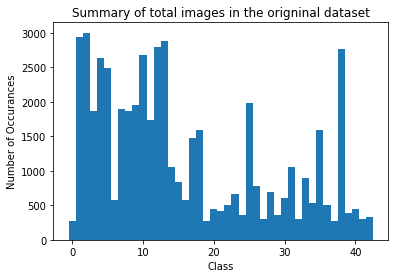

Number of training examples in the original dataset = 34799
Number of validation examples in the original dataset = 4410
Number of testing examples in the original dataset = 12630
Image data shape in the original dataset = (32, 32, 3)
Number of classes in the original dataset = 43


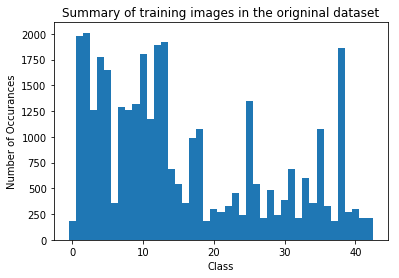

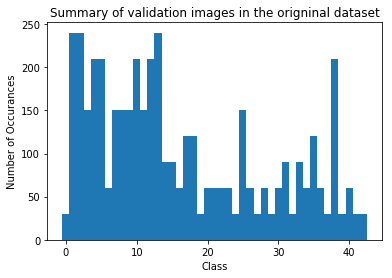

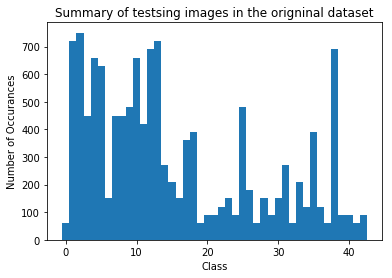

In [3]:
### Combine all the original data
X_combined = np.concatenate((X_train, X_valid, X_test), axis=0) # row wise
y_combined = np.concatenate((y_train, y_valid, y_test), axis=0) # row wise

### Summary of test data
unique1, counts1 = np.unique(y_combined, return_counts=True)

print('Number of total images in the original dataset =', len(X_combined))
print('Number of total labels in the original dataset =', len(y_combined))
print('Minimum number of labels in the original dataset =', np.min(counts1))
print('Maximum number of labels in the original dataset =', np.max(counts1))



plt.bar(unique1, counts1, 1)
plt.title('Summary of total images in the origninal dataset')
plt.xlabel('Class')
plt.ylabel('Number of Occurances')
plt.show()

## Statistics of the original datasets
n_train = len(X_train)

# number of validation examples
n_validation = len(X_valid)

# number of testing examples.
n_test = len(X_test)

# what's the shape of an traffic sign image?
image_shape = X_train[0].shape

# how many unique classes/labels there are in the dataset.
n_classes = len(unique1)

print("Number of training examples in the original dataset =", n_train)
print("Number of validation examples in the original dataset =", n_validation)
print("Number of testing examples in the original dataset =", n_test)
print("Image data shape in the original dataset =", image_shape)
print("Number of classes in the original dataset =", n_classes)

### summary of training data
unique2, counts2 = np.unique(y_train, return_counts=True)
plt.bar(unique2, counts2, 1)
plt.title('Summary of training images in the origninal dataset')
plt.xlabel('Class')
plt.ylabel('Number of Occurances')
plt.show()

### summary of validation data
unique3, counts3 = np.unique(y_valid, return_counts=True)
plt.bar(unique3, counts3, 1)
plt.title('Summary of validation images in the origninal dataset')
plt.xlabel('Class')
plt.ylabel('Number of Occurances')
plt.show()

### summary of test data
unique4, counts4 = np.unique(y_test, return_counts=True)
plt.bar(unique4, counts4, 1)
plt.title('Summary of testsing images in the origninal dataset')
plt.xlabel('Class')
plt.ylabel('Number of Occurances')
plt.show()

### Step 1.4: Load New Data

In [4]:
# Load pickled new data

training_file = "../data/new_train_data.p"
validation_file= "../data/new_valid_data.p"
testing_file = "../data/new_test_data.p"

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['X_train'], train['y_train']
X_valid, y_valid = valid['X_valid'], valid['y_valid']
X_test, y_test = test['X_test'], test['y_test']

# verfiy that the number of images in each set matches the number of labels in the same set
assert(len(X_train) == len(y_train))
assert(len(X_valid) == len(y_valid))
assert(len(X_test) == len(y_test))

### Step 1.5: Summary of New Data

Number of total images in the new dataset = 129000
Number of total labels in the new dataset = 129000
Minimum number of labels in the new dataset = 3000
Maximum number of labels in the new dataset = 3000


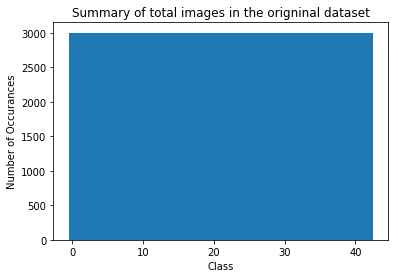

Number of training examples in the newly generated dataset = 77400
Number of validation examples in the newly generated dataset = 25800
Number of testing examples in the newly generated dataset = 25800
Image data shape in the newly generated dataset = (32, 32, 3)
Number of classes in the newly generated dataset = 43


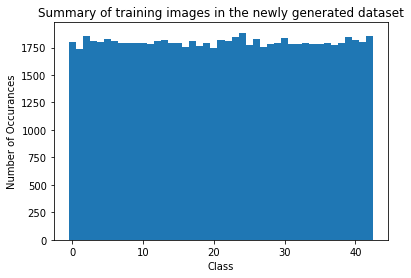

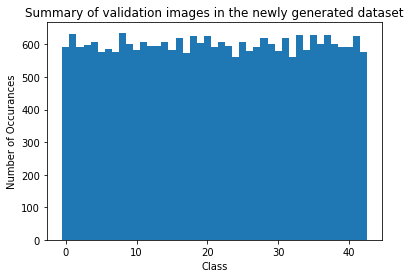

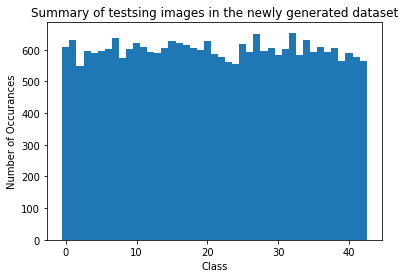

In [5]:
### Combine all the new data
X_combined = np.concatenate((X_train, X_valid, X_test), axis=0) # row wise
y_combined = np.concatenate((y_train, y_valid, y_test), axis=0) # row wise

### Summary of test data
unique1, counts1 = np.unique(y_combined, return_counts=True)

print('Number of total images in the new dataset =', len(X_combined))
print('Number of total labels in the new dataset =', len(y_combined))
print('Minimum number of labels in the new dataset =', np.min(counts1))
print('Maximum number of labels in the new dataset =', np.max(counts1))


plt.bar(unique1, counts1, 1)
plt.title('Summary of total images in the origninal dataset')
plt.xlabel('Class')
plt.ylabel('Number of Occurances')
plt.show()


## Statistics of the newly generated datasets
n_train = len(X_train)

# number of validation examples
n_validation = len(X_valid)

# number of testing examples.
n_test = len(X_test)

# what's the shape of an traffic sign image?
image_shape = X_train[0].shape

# how many unique classes/labels there are in the dataset.
n_classes = len(unique1)

print("Number of training examples in the newly generated dataset =", n_train)
print("Number of validation examples in the newly generated dataset =", n_validation)
print("Number of testing examples in the newly generated dataset =", n_test)
print("Image data shape in the newly generated dataset =", image_shape)
print("Number of classes in the newly generated dataset =", n_classes)

### summary of training data
unique2, counts2 = np.unique(y_train, return_counts=True)
plt.bar(unique2, counts2, 1)
plt.title('Summary of training images in the newly generated dataset')
plt.xlabel('Class')
plt.ylabel('Number of Occurances')
plt.show()

### summary of validation data
unique3, counts3 = np.unique(y_valid, return_counts=True)
plt.bar(unique3, counts3, 1)
plt.title('Summary of validation images in the newly generated dataset')
plt.xlabel('Class')
plt.ylabel('Number of Occurances')
plt.show()

### summary of test data
unique4, counts4 = np.unique(y_test, return_counts=True)
plt.bar(unique4, counts4, 1)
plt.title('Summary of testsing images in the newly generated dataset')
plt.xlabel('Class')
plt.ylabel('Number of Occurances')
plt.show()

## Step 2: Exploratory Visualization of New Dataset

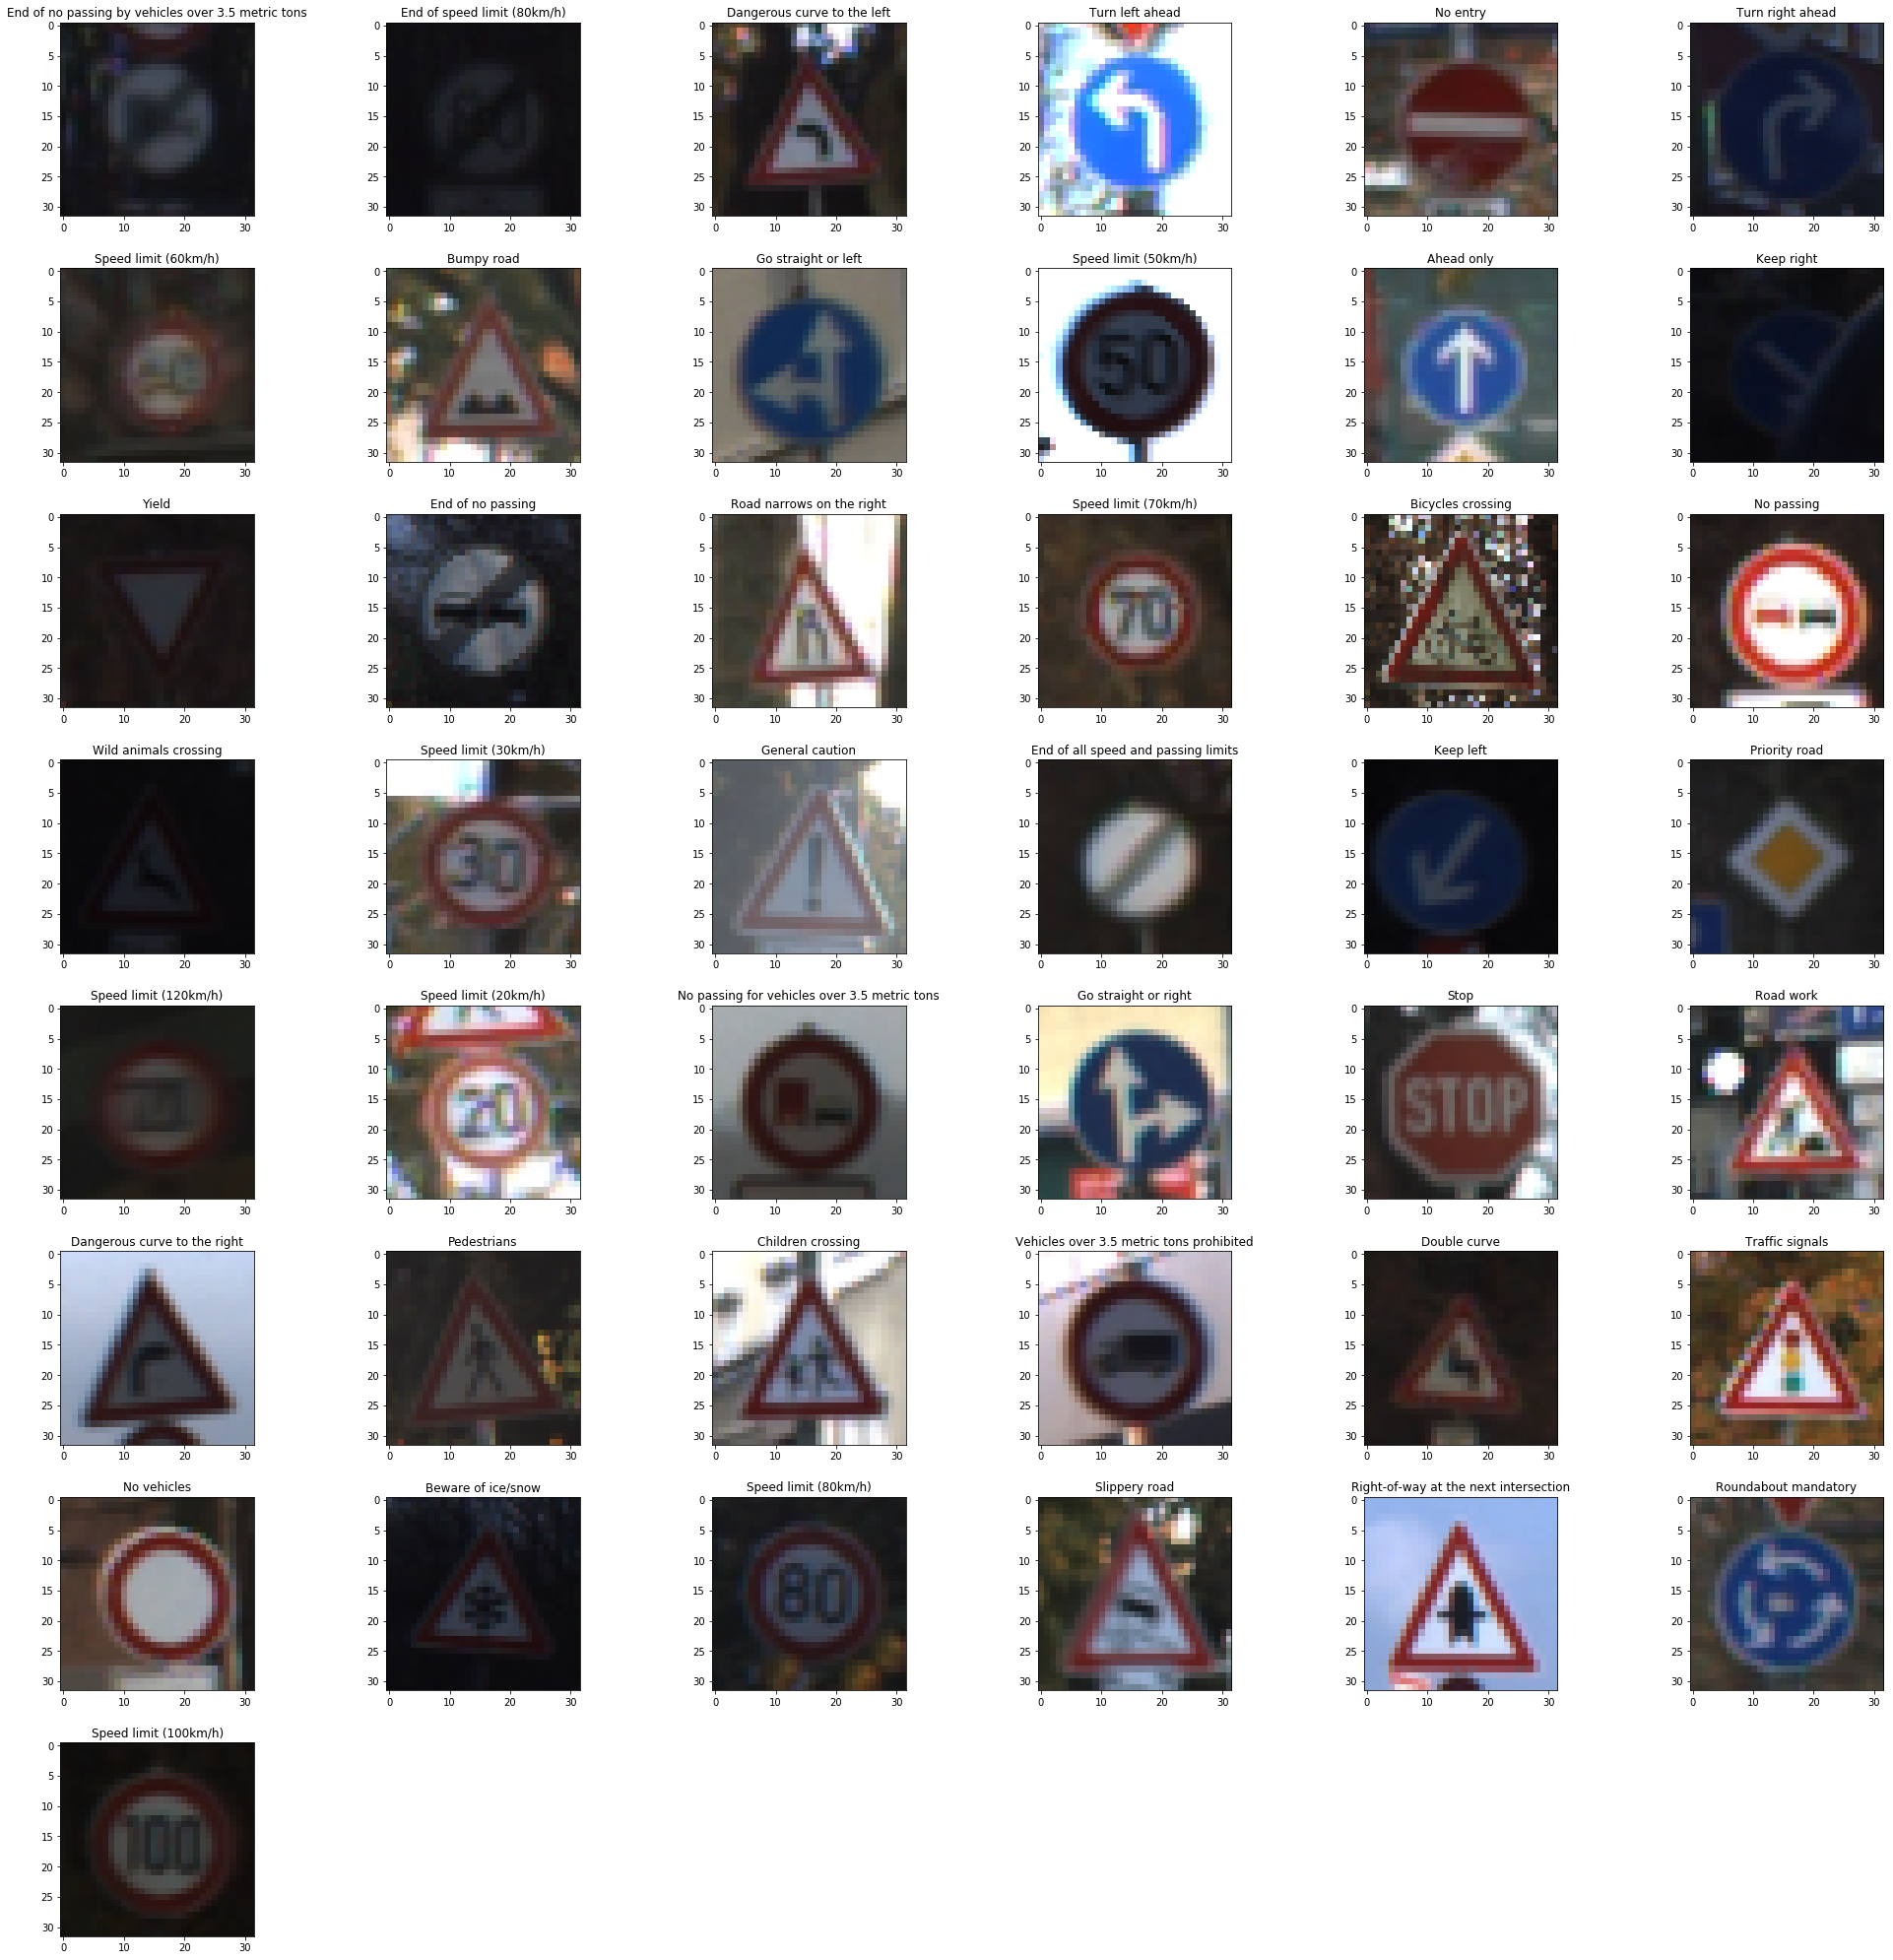

In [6]:
# Exploratory Visualization of Images of New Dataset
# Open the CSV File having Sign Names and Read in a List
name_list = []
with open('signnames.csv', mode ='r')as file:
    # Read the Sign Names
    content = csv.reader(file)
    for sign_names in content:
        name_list.append(sign_names)

input = 'exploratory_images/*.jpg'
name = glob.glob(input)
fig = plt.figure(figsize=(28, 28))
for i in range(43):
    fig.add_subplot(8, 6, i+1)
    image = mpimg.imread(name[i])
    plt.imshow(image)
    label = name[i].split('_')[2] 
    label = int(label.split('.')[0])
    sign_name = name_list[label+1][1]
    plt.title(sign_name)

fig.tight_layout(pad=2.0)


## Step 3: Preprocessing of the New Dataset 

### Step 3.1: Convert Images to Grayscale

In [7]:
# convert color images into grayscale images
def color_2_grayscale(image_data):
    gray_image_data = np.zeros(image_data.shape[:-1])
    #gray_image_data = np.zeros([len(image_data), image_data[0].shape[0], image_data[0].shape[1], 1])
    for i in range(len(image_data)):
        gray_image_data[i] = cv2.cvtColor(image_data[i],cv2.COLOR_RGB2GRAY)
    gray_image_data =  np.float32(gray_image_data)
    gray_image_data = gray_image_data.reshape(len(image_data),image_data[0].shape[0], image_data[0].shape[1], 1)
    return gray_image_data

X_train = color_2_grayscale(X_train)
X_valid = color_2_grayscale(X_valid)
X_test = color_2_grayscale(X_test)
print(X_train.shape)

(77400, 32, 32, 1)


### Step 3.2: Normalize Grayscale Images

In [8]:
# normalize grayscale images between [-1, 1], to have 0 mean and unit standard deviation
def normalize_grayscale(image_data):
    """
    Normalize the image data with Min-Max scaling to a range of [-1, 1]
    :param image_data: The image data to be normalized
    :return: Normalized image data
    """
    img_min = 0
    img_max = 255
    new_min = -1
    new_max = 1
    x1 = (image_data - img_min) / (img_max - img_min)
    x2 = x1 * (new_max - new_min)
    x2 = x2 + new_min
    return x2

X_train = normalize_grayscale(X_train)
X_valid = normalize_grayscale(X_valid)
X_test = normalize_grayscale(X_test)
#print(X_train.dtype) # uncomment to check data type of image
print(X_train.shape)

(77400, 32, 32, 1)


### Step 3.3: Visualization of Preprocessed Images

Text(0.5,1,'Normalized Image')

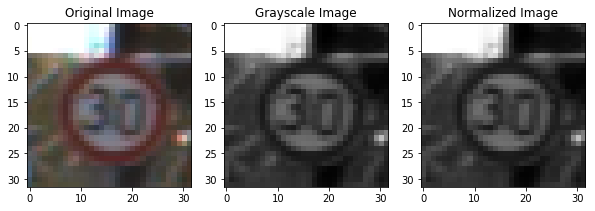

In [9]:
path1= 'exploratory_images/label_1.jpg'
path2 = 'preprocessed_images/graysacle_label_1.jpg'
path3 = 'preprocessed_images/normalized_graysacle_label_1.jpg'

fig = plt.figure(figsize=(10, 10))
fig.add_subplot(1, 3, 1)
image = mpimg.imread(path1)
plt.imshow(image)    
plt.title('Original Image')

fig.add_subplot(1, 3, 2)
image = mpimg.imread(path2)
plt.imshow(image)    
plt.title('Grayscale Image')

fig.add_subplot(1, 3, 3)
image = mpimg.imread(path3)
plt.imshow(image)    
plt.title('Normalized Image')

### Step 4: Model Architecture, Training, Validation, and Testing

### Step 4.1: Define Variables

In [10]:
# define variables
EPOCHS = 50
BATCH_SIZE = 128
rate = 0.0008
n_classes = 43

# define weight and biases for LeNet
# Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
mu = 0 # mean of weights
sigma = 0.1 # standard deviation of weights

W1 = tf.Variable(tf.truncated_normal([5, 5, 1, 6], mu, sigma), name = "W1")# [height, width, input_depth, output_depth]
W2 = tf.Variable(tf.truncated_normal([5, 5, 6, 16], mu, sigma), name = "W2") # [height, width, input_depth, output_depth]
W3 = tf.Variable(tf.truncated_normal([5*5*16, 120], mu, sigma), name = "W3") # [input_features, output_features]
W4 = tf.Variable(tf.truncated_normal([120, 84], mu, sigma), name = "W4") # [input_features, output_classes]
W5 = tf.Variable(tf.truncated_normal([84, n_classes], mu, sigma), name = "W5") # [input_features, output_classes]

b1 = tf.Variable(tf.zeros(6), name = "b1") # depth of convolution
b2 = tf.Variable(tf.zeros(16), name = "b2") # depth of convolution
b3 = tf.Variable(tf.zeros(120), name = "b3") # number of output features in fully connected layer
b4 = tf.Variable(tf.zeros(84), name = "b4") # number of classes in output layer           
b5 = tf.Variable(tf.zeros(n_classes), name = "b5") # number of classes in output layer      
                 
# define Tensor Variables
# x stores our images
x = tf.placeholder(tf.float32, (None, 32, 32, 1)) # placeholder that will store our input batches
# here we take batch =  None, which allows the placeholder to later accept a btach of any size and 
# images size is set to 32 * 32 *1

# y stores our labels
y = tf.placeholder(tf.int32, (None)) # labels come through with sparse variables, which means that they are integers
# they are not one-hot encoded yet. 

dropout = tf.placeholder(tf.float32) 

one_hot_y = tf.one_hot(y, n_classes) # tf.one_hot() function to one-hot encode the labels

### Step 4.2: Modifined LeNet

In [11]:
# define LeNet 
def Modified_LeNet(x, dropout):    
    strides = 1
    # TODO: Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x16, i.e., (H: (32 - 5 + 1)/1, W =(32 - 5 + 1)/1)
    conv1 = tf.nn.conv2d(x, W1, strides=[1, strides, strides, 1], padding='VALID')
    conv1 = tf.nn.bias_add(conv1, b1)
    # TODO: Activation.
    conv1 = tf.nn.relu(conv1)
    # TODO: Pooling. Input = 28x28x16. Output = 14x14x6.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')
    #print(conv1)
    # TODO: Layer 2: Convolutional Input = 14x14x16 Output = 10x10x16.
    conv2 = tf.nn.conv2d(conv1, W2, strides=[1, strides, strides, 1], padding='VALID')
    conv2 = tf.nn.bias_add(conv2, b2)
    # TODO: Activation.
    conv2 = tf.nn.relu(conv2)
    # TODO: Pooling. Input = 10x10x16. Output = 5x5x16.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')
    #print(conv2)
    # TODO: Flatten. Input = 5x5x16. Output = 400.
    fc1 = tf.reshape(conv2, [-1, W3.get_shape().as_list()[0]])
    # TODO: Layer 3: Fully Connected. Input = 400. Output = 120.
    fc1 = tf.add(tf.matmul(fc1,W3), b3)
    # TODO: Activation.
    fc1 = tf.nn.relu(fc1) # Input = 120. Output = 120.
    fc1 = tf.nn.dropout(fc1, dropout) # Input = 120. Output = 120.
    #print(fc1)
    # TODO: Layer 4: Fully Connected. Input = 120. Output = 84.
    fc2 = tf.add(tf.matmul(fc1, W4), b4)
    # TODO: Activation.
    fc2 = tf.nn.relu(fc2) 
    fc2 = tf.nn.dropout(fc2, dropout)
    #print(fc2)
    # TODO: Layer 5: Fully Connected. Input = 84. Output = n_classes.
    fc3 = tf.add(tf.matmul(fc2, W5), b5)
    #print(fc3)
    logits = fc3
    return logits


### Step 4.3: Pipeline for Train, Validate and Test 

In [14]:
# Pipeline for training
# learning rate
beta = 0.0001
# we set up our training pipeline here to train the model
logits = Modified_LeNet(x, dropout) # pass the input data to LeNet() to calculate our logits
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits) # tf.nn.softmax_cross_entropy_with_logits() 
#function is used to compare those logits to the ground truth labels and caculate the cross entropy
# cross entropy is a measure of how different the logits are from the ground truth training labels

# Loss function using L2 Regularization
loss_operation = tf.reduce_mean(cross_entropy + beta * tf.nn.l2_loss(W1) + beta * tf.nn.l2_loss(W2) +
    beta * tf.nn.l2_loss(W3) + beta * tf.nn.l2_loss(W4) + beta * tf.nn.l2_loss(W5)) 
loss_operation1 = tf.reduce_mean(cross_entropy) 
# tf.reduce_mean() function is used calculate the average cross entropy from all the training images
optimizer = tf.train.AdamOptimizer(learning_rate = rate) # tf.train.AdamOptimizer() function is used to minimize the loss 
# function similarly to what stochastic gradient descent does. The Adam algorithm is a little more sophisticated than stochastic
# gradeient descent, so its a good defualt choice for an optimizer. This where we use learning rate hyper-parameter
training_operation = optimizer.minimize(loss_operation) # we run the minimize function on the optimizer which uses backpropagation
# to update the network and minimize our training loss

### Step 4.4: Function to Evaluate Model

In [15]:
# Evaluution pipeline to evaluute the model, i.e., how good the model is

# measure whether a given prediction is correct by comparing the logit prediction ot the one-hot encoded ground truth label
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))

# calculate the model's overall accuracy by averaging the individual prediciton accuracies
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

# build evaluate functions to evaluate accuracy and loss
def evaluate(X_data, y_data, prob): # dataset as input
    num_examples = len(X_data) # number of samples in X_data
    total_accuracy = 0 
    total_loss = 0
    sess = tf.get_default_session()
    # batches the dataset and runs it through the evaluation pipeline for accuracy 
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        loss, accuracy = sess.run([loss_operation1, accuracy_operation], feed_dict={x: batch_x, y: batch_y, dropout: prob})
        total_accuracy += (accuracy * len(batch_x)) # add total accuracies for all the batches
        total_loss += (loss * len(batch_x))  # add total losses for all the batches
    accu = total_accuracy / num_examples
    los = total_loss / num_examples
    return los, accu  # returns the average accuracy and loss for the data set


### Step 4.5: Training

Training...

EPOCH 1 ...
Training Loss = 0.658
Training Accuracy = 85.17

Validation Loss = 0.665
Validation Accuracy = 84.86

Best model saved


EPOCH 2 ...
Training Loss = 0.321
Training Accuracy = 93.31

Validation Loss = 0.328
Validation Accuracy = 93.08

Best model saved


EPOCH 3 ...
Training Loss = 0.210
Training Accuracy = 95.74

Validation Loss = 0.221
Validation Accuracy = 95.50

Best model saved


EPOCH 4 ...
Training Loss = 0.144
Training Accuracy = 96.75

Validation Loss = 0.154
Validation Accuracy = 96.65

Best model saved


EPOCH 5 ...
Training Loss = 0.113
Training Accuracy = 97.64

Validation Loss = 0.123
Validation Accuracy = 97.43

Best model saved


EPOCH 6 ...
Training Loss = 0.085
Training Accuracy = 98.04

Validation Loss = 0.097
Validation Accuracy = 97.76

Best model saved


EPOCH 7 ...
Training Loss = 0.069
Training Accuracy = 98.47

Validation Loss = 0.081
Validation Accuracy = 98.31

Best model saved


EPOCH 8 ...
Training Loss = 0.059
Training Accuracy = 98

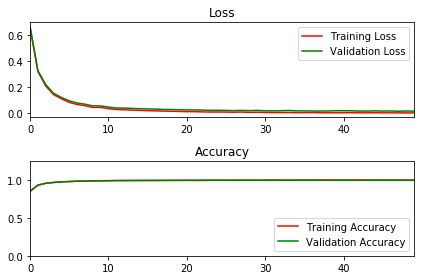

In [16]:
# Train and validate our model
epochs = []
train_loss = []
valid_loss = []
train_accuracy = []
valid_accuracy = []

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer()) # initialize the tensor variables. 
    num_examples = len(X_train) # number of examples in the training data
    
    # shuffle training data
    # its important to shuffle the training data otherwise the ordering of data might have huge effect on how well the model trains
    X_train, y_train = shuffle(X_train, y_train)

    
    print("Training...")
    print()
    max_accuracy = 0
    for i in range(EPOCHS): # train the model for EPOCHS number of iterations
        total_accuracy = 0
        total_loss = 0
        X_train, y_train = shuffle(X_train, y_train) # shuffle the training data to ensure that our training isn't biased by the
        # order of the images. 
        
        # now we break up our training data into batches and train the model on each batch 
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation,feed_dict={x: batch_x, y: batch_y, dropout: 0.5})

          
        # at the end of each epoch, we evaluate the model on our validation data 
        training_loss, training_accuracy = evaluate(X_train, y_train, 1.0)
        validation_loss, validation_accuracy = evaluate(X_valid, y_valid, 1.0)
        print("EPOCH {} ...".format(i+1))
        print("Training Loss = {:.3f}".format(training_loss))
        print("Training Accuracy = {:.2f}".format(training_accuracy*100))
        print()
        print("Validation Loss = {:.3f}".format(validation_loss))
        print("Validation Accuracy = {:.2f}".format(validation_accuracy*100))
        print()
        epochs.append(i)
        train_loss.append(training_loss)
        valid_loss.append(validation_loss)
        train_accuracy.append(training_accuracy)
        valid_accuracy.append(validation_accuracy)
        if max_accuracy < validation_accuracy: # we save the model having maximum accuracy on validation data
            max_accuracy = validation_accuracy # so, we can load up later and modify it or evaluate the model on test dataset
            saver.save(sess, './Modified_LeNet.ckpt')
            print("Best model saved")
        print()
        print()

loss_plot = plt.subplot(211)
loss_plot.set_title('Loss')
loss_plot.plot(epochs, train_loss, 'r', label='Training Loss')
loss_plot.plot(epochs, valid_loss, 'g', label='Validation Loss')
loss_plot.set_xlim([epochs[0], epochs[-1]])
loss_plot.legend(loc=1)
acc_plot = plt.subplot(212)
acc_plot.set_title('Accuracy')
acc_plot.plot(epochs, train_accuracy, 'r', label='Training Accuracy')
acc_plot.plot(epochs, valid_accuracy, 'g', label='Validation Accuracy')
acc_plot.set_ylim([0, 1.25])
acc_plot.set_xlim([epochs[0], epochs[-1]])
acc_plot.legend(loc=4)
plt.tight_layout()
plt.show()

In [17]:
# Print validation accuracy of the best model
print("Validation Accuracy of Best Model = {:.2f}".format(max_accuracy*100))

Validation Accuracy of Best Model = 99.63


### Step 4.6: Load Best Model and Evaluate it Using Testing Data

In [18]:
# Run the best model on the testing data and evauluate accuracy 
save_file = './Modified_LeNet.ckpt'
with tf.Session() as sess:
    saver.restore(sess, save_file)
    accuracy = sess.run(accuracy_operation, feed_dict={x: X_test, y: y_test, dropout: 1.0})

print('Test Accuracy = {:.2f}'.format(accuracy*100))

INFO:tensorflow:Restoring parameters from ./LeNet.ckpt
Test Accuracy = 99.50


## Step 5: Load and Preprocess New Images

New Images Downloaded from Internet


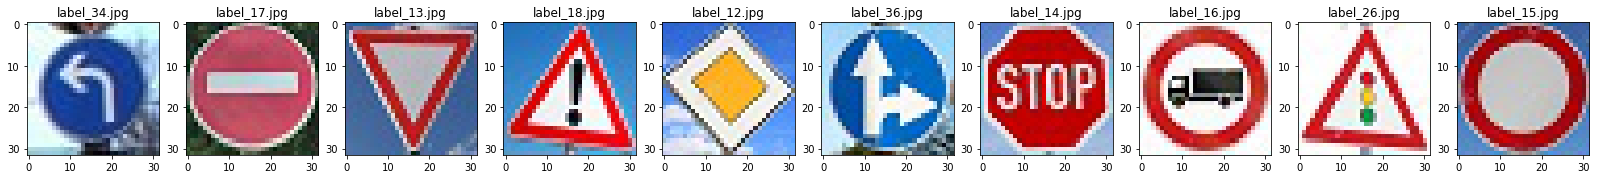

Grayscale New Images Downloaded from Internet


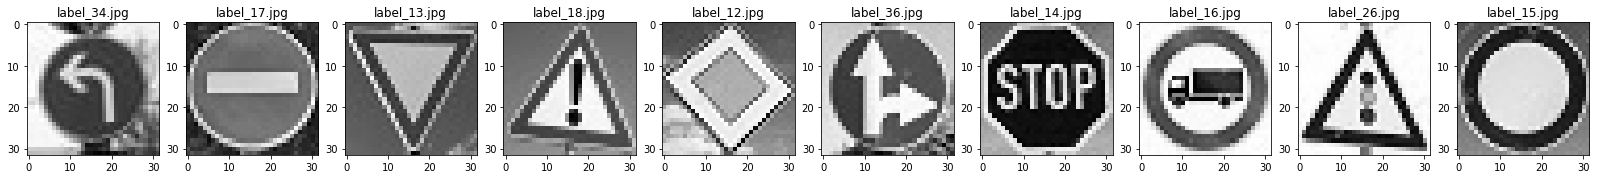

Normalized Grayscale New Images Downloaded from Internet


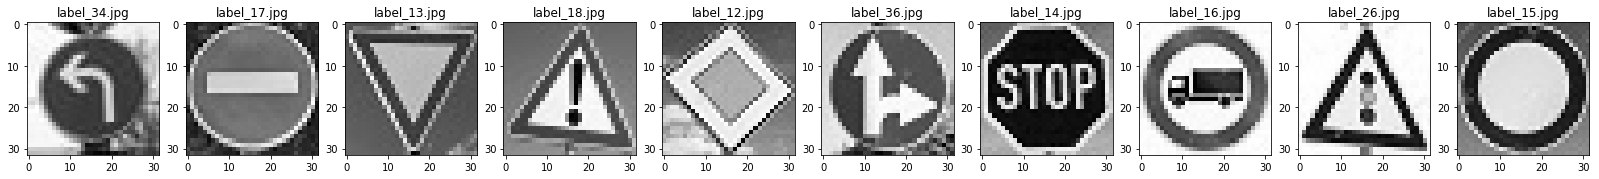

In [19]:
# Load the new images found on the internet
input = 'test_images/*.jpg'
name = glob.glob(input)
X_new = [ ]
y_new = [ ]
for image in name:  
    #print(image)
    img_name = image.split('_')[2] 
    label = img_name.split('.')[0] 
    y_new.append(np.uint8(label))
    img = mpimg.imread(image)
    X_new.append(img)

X_new = np.array(X_new)
y_new = np.array(y_new)

#squeeze()

# Plot the new images downloaded from the internet
print('New Images Downloaded from Internet')
fig = plt.figure(figsize=(28, 28))
for i in range(10):
    fig.add_subplot(1, 10, i+1)
    plt.imshow(X_new[i])
    img_name = name[i].split('/')[1] 
    plt.title(img_name)

plt.show()

# Convert the new images to grayscale and plot them
X_new = color_2_grayscale(X_new)
print('Grayscale New Images Downloaded from Internet')
fig = plt.figure(figsize=(28, 28))
for i in range(10):
    fig.add_subplot(1, 10, i+1)
    plt.imshow(X_new[i].reshape(32,32), cmap = 'gray')
    img_name = name[i].split('/')[1] 
    plt.title(img_name)

plt.show()

# Normalize the grayscale images and plot them
X_new = normalize_grayscale(X_new)
print('Normalized Grayscale New Images Downloaded from Internet')
fig = plt.figure(figsize=(28, 28))
for i in range(10):
    fig.add_subplot(1, 10, i+1)
    plt.imshow(X_new[i].reshape(32,32), cmap = 'gray')
    img_name = name[i].split('/')[1] 
    plt.title(img_name)

plt.show()

## Step 6: Test a Model on New Images

### Step 6.1: Predict the Sign Type for Each Image

In [20]:
# Run the best model on the new images downloaded from the internet
save_file = './Modified_LeNet.ckpt'
with tf.Session() as sess:
    saver.restore(sess, save_file)
    labels = sess.run(logits, feed_dict={x: X_new, y: y_new, dropout: 1.0})

for i in range(10):
    print('Actual Label is', y_new[i], 'and Predicted Label is', np.argmax(labels[i]))

INFO:tensorflow:Restoring parameters from ./LeNet.ckpt
Actual Label is 34 and Predicted Label is 34
Actual Label is 17 and Predicted Label is 17
Actual Label is 13 and Predicted Label is 13
Actual Label is 18 and Predicted Label is 18
Actual Label is 12 and Predicted Label is 12
Actual Label is 36 and Predicted Label is 36
Actual Label is 14 and Predicted Label is 14
Actual Label is 16 and Predicted Label is 7
Actual Label is 26 and Predicted Label is 26
Actual Label is 15 and Predicted Label is 15


### Step 6.2: Accuracy of Model on New Test Images

In [21]:
# Calculate the accuracy for new images. 
with tf.Session() as sess:
    saver.restore(sess, save_file)
    accuracy = sess.run(accuracy_operation, feed_dict={x: X_new, y: y_new, dropout: 1.0})

print('Accuracy of Prediction for New Images = {:.2f}'.format(accuracy*100))

INFO:tensorflow:Restoring parameters from ./LeNet.ckpt
Accuracy of Prediction for New Images = 90.00


### Step 6.3: Output Top 5 Softmax Probabilities For Each Image Found on the Web

In [22]:
# Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
with tf.Session() as sess:
    saver.restore(sess, save_file)
    labels = sess.run(logits, feed_dict={x: X_new, y: y_new, dropout: 1.0})
    top_five_prob = sess.run(tf.nn.top_k(tf.nn.softmax(labels), k=5))

np.set_printoptions(precision=2, suppress=True)
for i in range(top_five_prob[0].shape[0]):
    print('Top 5 Softmax Probabilies and their Labels for New Image with Label', y_new[i])
    print(top_five_prob[0][i] * 100)
    print(top_five_prob[1][i])
    print()

INFO:tensorflow:Restoring parameters from ./LeNet.ckpt
Top 5 Softmax Probabilies and their Labels for New Image with Label 34
[ 100.    0.    0.    0.    0.]
[34 35 14 38 30]

Top 5 Softmax Probabilies and their Labels for New Image with Label 17
[ 58.02  41.65   0.31   0.01   0.01]
[17  9 34 41 13]

Top 5 Softmax Probabilies and their Labels for New Image with Label 13
[ 100.    0.    0.    0.    0.]
[13 12  9 35 15]

Top 5 Softmax Probabilies and their Labels for New Image with Label 18
[ 100.    0.    0.    0.    0.]
[18 26 25 24 22]

Top 5 Softmax Probabilies and their Labels for New Image with Label 12
[ 100.    0.    0.    0.    0.]
[12 13  7 40 38]

Top 5 Softmax Probabilies and their Labels for New Image with Label 36
[100.   0.   0.   0.   0.]
[36 38 32 41 13]

Top 5 Softmax Probabilies and their Labels for New Image with Label 14
[ 91.17   5.34   2.51   0.6    0.16]
[14  2 38 25 21]

Top 5 Softmax Probabilies and their Labels for New Image with Label 16
[ 80.26  16.49   3.25 